#Árbol de decisión: anemia


##Lectura de datos y creación de dataframe

In [ ]:
# Importar la biblioteca pandas
import pandas as pd

#Especificar la ruta del archivo CSV
file_path = './data/data_ane.csv'

#Leer el archivo CSV y crear el dataframe
df = pd.read_csv(file_path, sep=',')

#Mostrar las primeras filas del dataframe para verificar que se haya leído correctamente
df.head()

,HEMATOCRITO,HEMOGLOBINA,GLOB_ROJOS,VOL_CORPUSCULAR_M,HGB_CORPUSCULAR_M,C_HGB_CORPUSCULAR_M,TARGET
0,48.2,14.9,5.17,93.1,28.9,31.0,0
1,49.8,16.2,5.42,91.9,30.0,32.6,0
2,46.3,14.7,4.63,100.0,31.8,31.7,1
3,49.0,15.8,5.36,91.4,29.4,32.2,0
4,43.9,14.0,4.79,91.7,29.2,31.8,0


##Importación de librería

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

##Normalización de los datos

In [ ]:
X = df.drop(columns='TARGET')

In [ ]:
y= df['TARGET']

In [ ]:
feature_names = X.columns

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)


##Implementación del modelo

In [ ]:
# Inicializar el clasificador de árbol de decisiones
clf = DecisionTreeClassifier(random_state=2, max_depth=5)

# Entrenar el modelo con los datos normalizados
clf.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, random_state=2)

##Gráfico de árbol de decisión

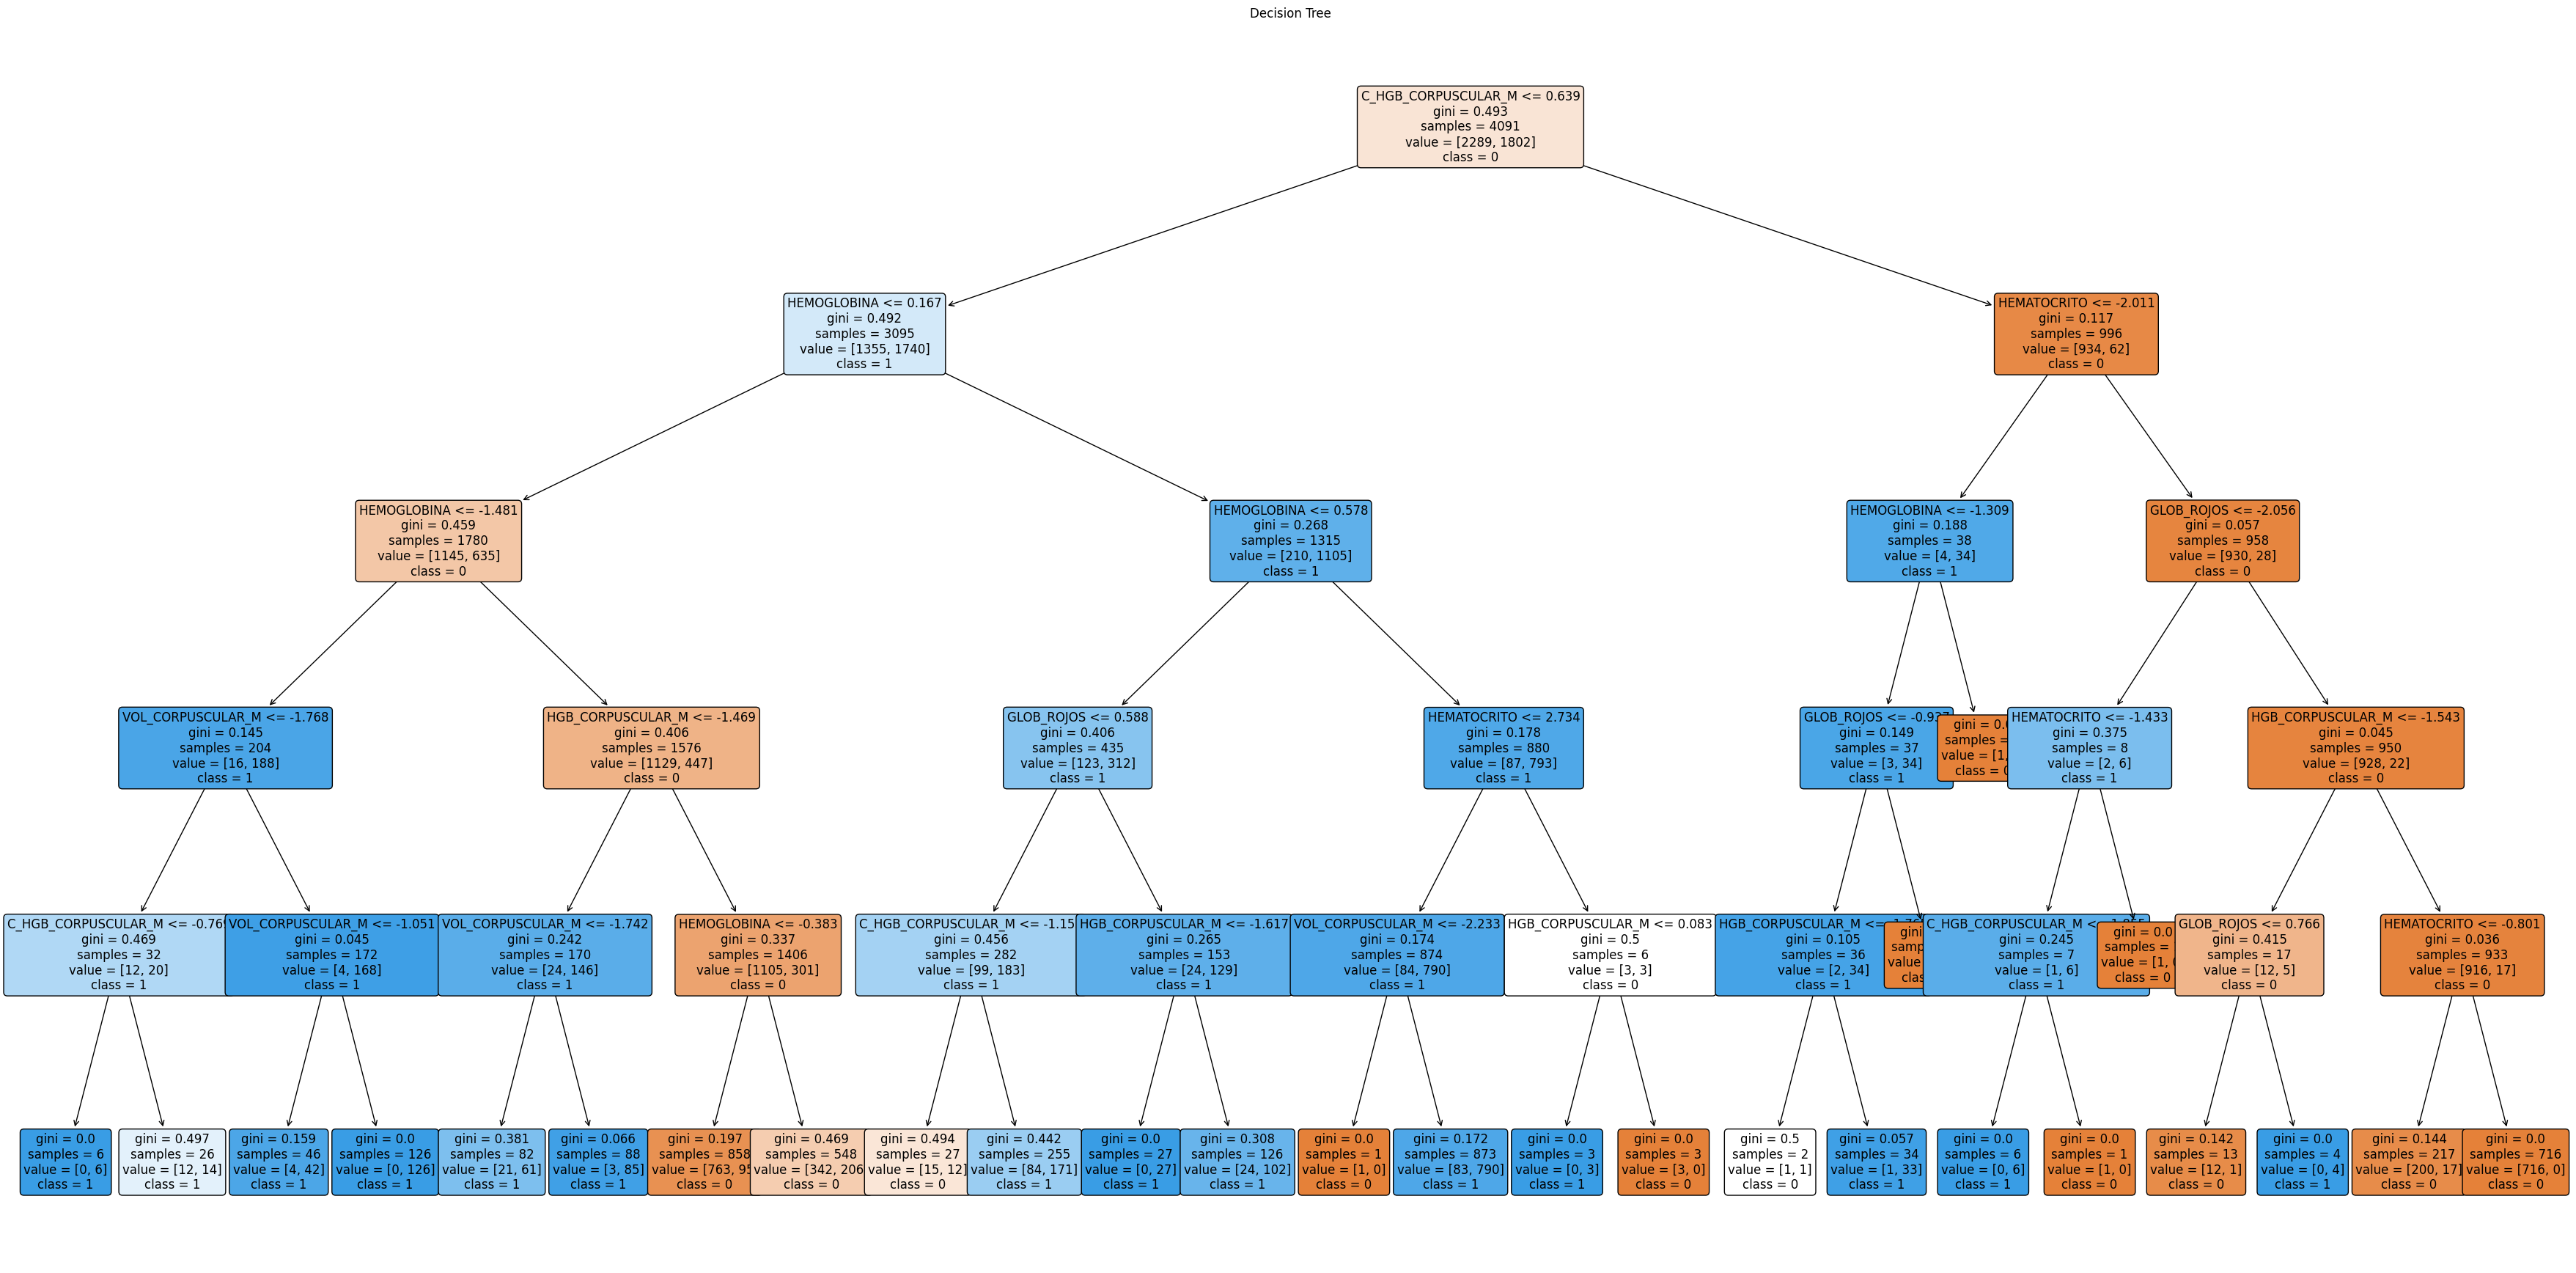

In [ ]:
# Visualizar el árbol de decisiones
plt.figure(figsize=(45, 22))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=np.unique(y).astype(str), rounded=True, fontsize=12)
plt.title('Decision Tree')
plt.show()

##Matríz de dispersión vibariable

/home/roof/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roof/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roof/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roof/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

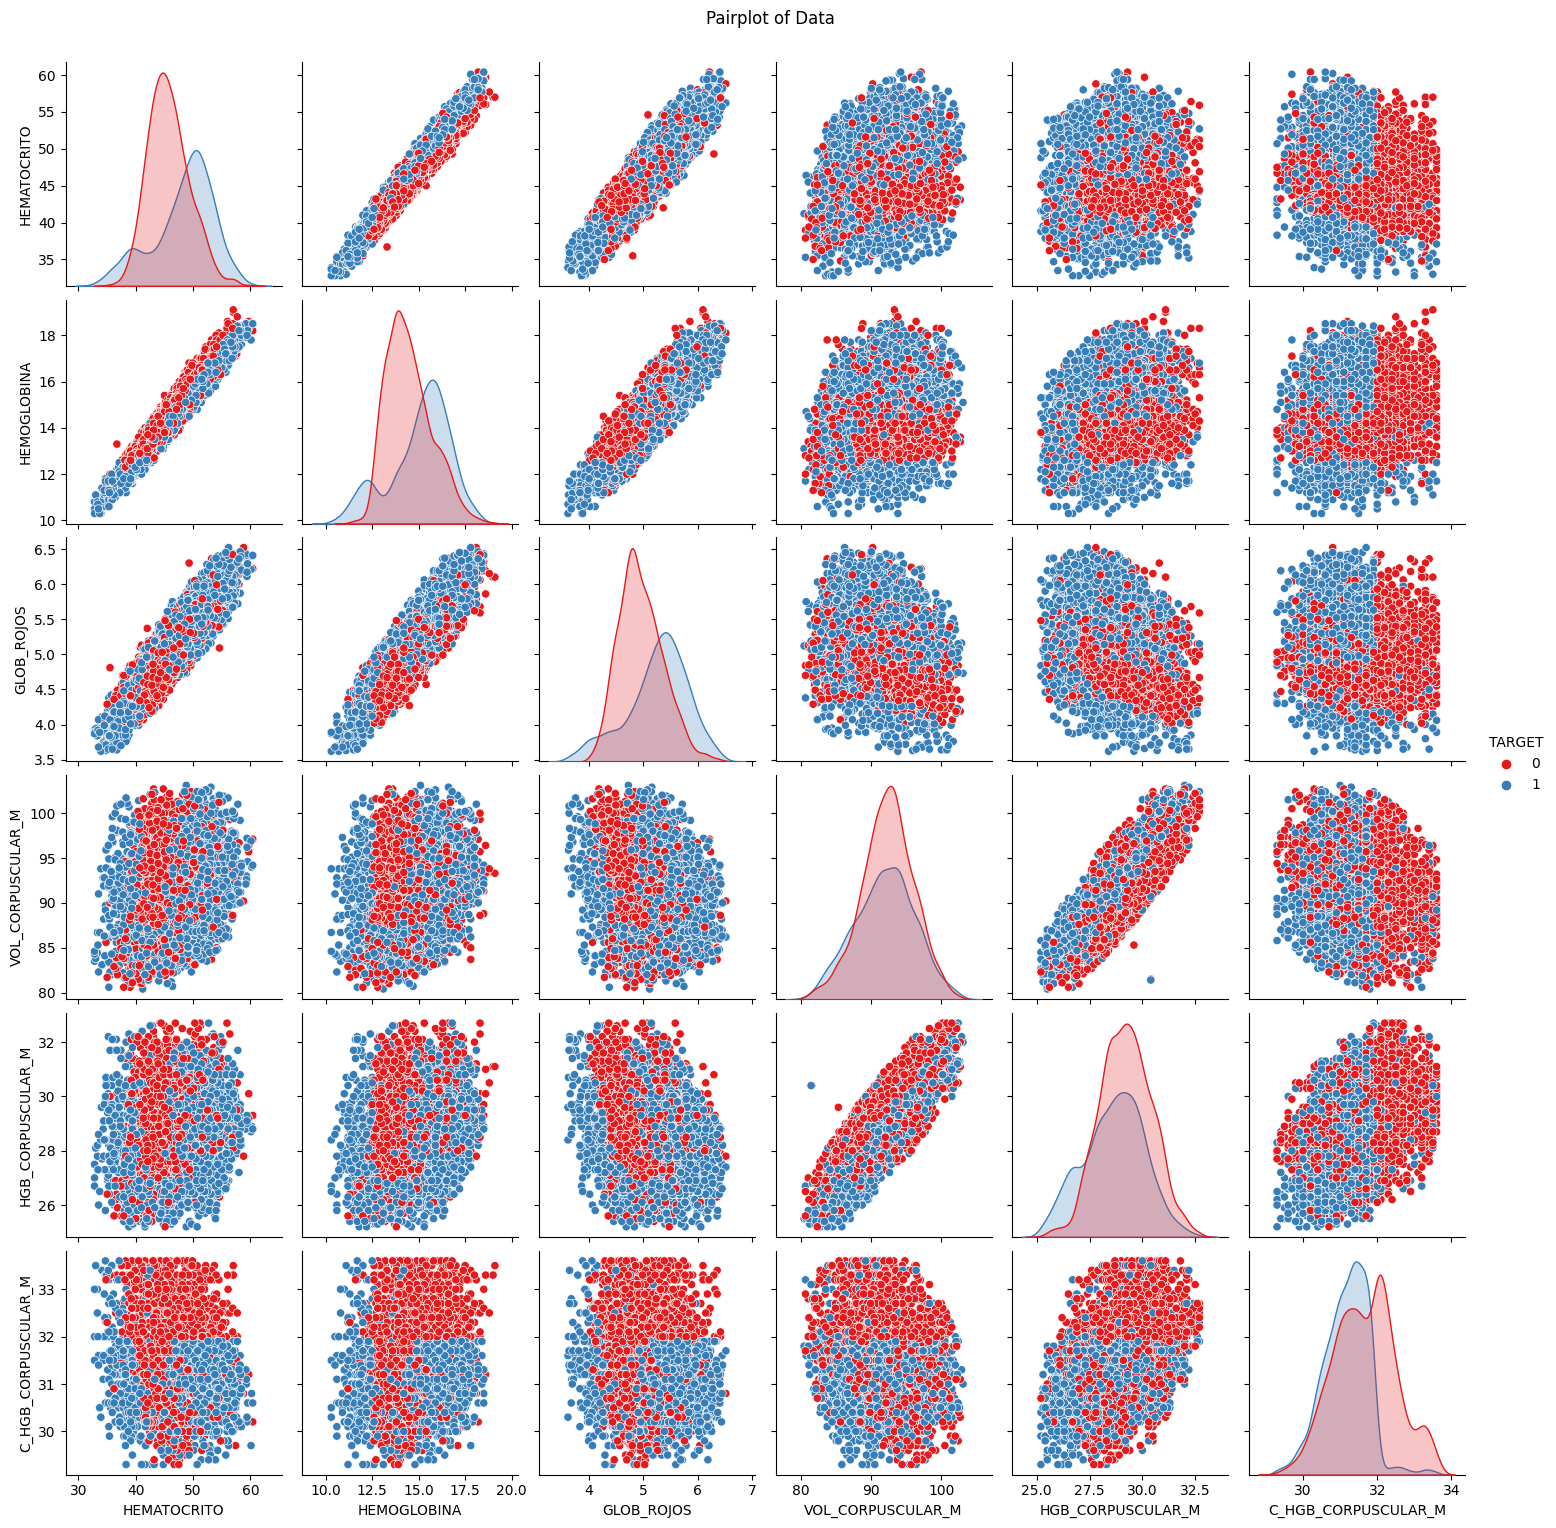

In [ ]:
# Visualización de las características
sns.pairplot(df, hue='TARGET', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Data", y=1.02)
plt.show()

##Métricas de rendimiento

In [ ]:
y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


Accuracy: 0.862599771949829
Precision: 0.8539325842696629
Recall (Sensitivity): 0.8161073825503355
F1-Score: 0.8345916266300618


In [ ]:
import numpy as np
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", np.mean(scores))

Cross-validation scores:  [0.86569718 0.8075278  0.84858854 0.84345595 0.8528657 ]
Mean cross-validation score:  0.8436270316509837


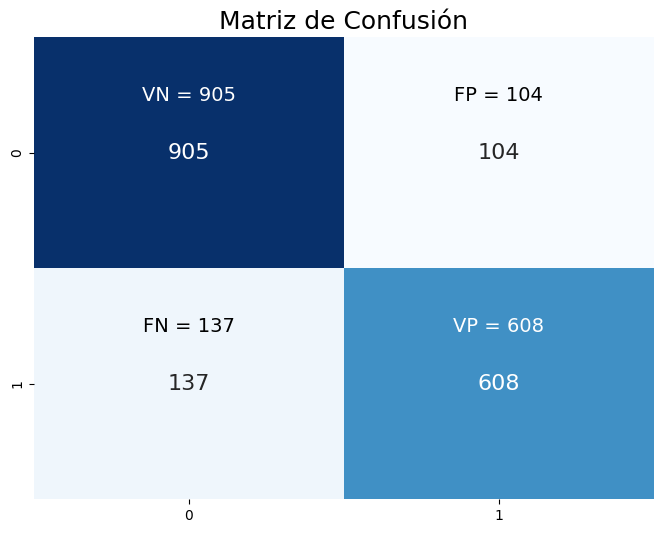

Verdaderos Negativos (TN): 905
Falsos Positivos (FP): 104
Falsos Negativos (FN): 137
Verdaderos Positivos (TP): 608


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# Visualizar la matriz de confusión con anotaciones
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Añadir etiquetas para mayor claridad
plt.title('Matriz de Confusión', fontsize=18)
plt.text(0.5, 0.25, f'VN = {TN}', ha='center', va='center', color='white', fontsize=14)
plt.text(1.5, 0.25, f'FP = {FP}', ha='center', va='center', color='black', fontsize=14)
plt.text(0.5, 1.25, f'FN = {FN}', ha='center', va='center', color='black', fontsize=14)
plt.text(1.5, 1.25, f'VP = {TP}', ha='center', va='center', color='white', fontsize=14)

plt.show()

# Imprimir los valores de la matriz de confusión
print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdaderos Positivos (TP): {TP}")

